In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import os

In [8]:
from pathlib import Path

# Configurable parts
SOURCE = "dukascopy"
SYMBOL = "usdjpy"
EVENT = '58m-dollar'
START_DATE = "2020-01-01"
END_DATE = "2024-12-31"

# Build base name
BASE_NAME = f"{SOURCE}-{SYMBOL}-tick-{START_DATE}-{END_DATE}"
RESAMPLED_NAME = f"{SOURCE}-{SYMBOL}-{EVENT}-{START_DATE}-{END_DATE}"

# Base directories
BASE_DIR = Path("../data")
RESAMPLED_DIR = BASE_DIR / "resampled"

# Final paths
RESAMPLED_FILE_PATH = RESAMPLED_DIR / f"{RESAMPLED_NAME}.pkl"

In [9]:
EVENT_NAME = 'cusum_filter'
DIRECTION_LABEL_DIR = BASE_DIR / "direction_labels"
DIRECTION_LABEL_DIR.mkdir(parents=True, exist_ok=True)
DIRECTION_LABEL_FILE_PATH = DIRECTION_LABEL_DIR / f"{RESAMPLED_NAME}-{EVENT_NAME}.pkl"

In [10]:
%%time
df = pd.read_pickle(RESAMPLED_FILE_PATH)

CPU times: user 1.19 ms, sys: 29.4 ms, total: 30.6 ms
Wall time: 28.9 ms


In [11]:
labels_df = pd.read_pickle(DIRECTION_LABEL_FILE_PATH)

In [12]:
df.loc[labels_df.index]

KeyError: "None of [DatetimeIndex(['2020-01-01 23:21:26.690000', '2020-01-02 00:17:03.844000',\n               '2020-01-02 00:41:29.036000', '2020-01-02 00:57:40.782000',\n               '2020-01-02 01:04:50.810000', '2020-01-02 01:09:57.381000',\n               '2020-01-02 01:15:32.427000', '2020-01-02 01:21:13.847000',\n               '2020-01-02 01:59:56.630000', '2020-01-02 02:02:34.086000',\n               ...\n               '2024-12-30 23:06:27.988000', '2024-12-30 23:08:12.101000',\n               '2024-12-30 23:13:31.707000', '2024-12-30 23:17:32.270000',\n               '2024-12-30 23:20:43.878000', '2024-12-30 23:32:26.048000',\n               '2024-12-30 23:34:02.941000', '2024-12-30 23:38:17.708000',\n               '2024-12-30 23:40:27.389000', '2024-12-30 23:46:24.916000'],\n              dtype='datetime64[ns]', name='timestamp', length=693869, freq=None)] are in the [index]"

In [5]:
df.shape

(1822488, 7)

In [6]:
df.head()

,timestamp,open,high,low,close,volume,spread
0,2020-01-01 22:06:51.864,108.7580,108.7700,108.7495,108.7565,534640.000865,0.027887
1,2020-01-01 22:07:29.989,108.7595,108.7615,108.7510,108.7595,533939.994574,0.020597
2,2020-01-01 22:08:54.106,108.7605,108.7645,108.7495,108.7575,535240.000248,0.022207
3,2020-01-01 22:09:47.753,108.7565,108.7625,108.7460,108.7495,535280.000806,0.032033
4,2020-01-01 22:13:29.431,108.7495,108.7600,108.6495,108.7455,534949.996591,0.024844


In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

df = df.set_index('timestamp')

df.head()

,open,high,low,close,volume,spread
timestamp,,,,,,
2020-01-01 22:06:51.864,108.7580,108.7700,108.7495,108.7565,534640.000865,0.027887
2020-01-01 22:07:29.989,108.7595,108.7615,108.7510,108.7595,533939.994574,0.020597
2020-01-01 22:08:54.106,108.7605,108.7645,108.7495,108.7575,535240.000248,0.022207
2020-01-01 22:09:47.753,108.7565,108.7625,108.7460,108.7495,535280.000806,0.032033
2020-01-01 22:13:29.431,108.7495,108.7600,108.6495,108.7455,534949.996591,0.024844


In [8]:
import numpy as np

df['log_return'] = np.log(df['close'] / df['close'].shift(1))
df['log_volume'] = np.log1p(df['volume'])
df = df.dropna()

In [9]:
df.head()

,open,high,low,close,volume,spread,log_return,log_volume
timestamp,,,,,,,,
2020-01-01 22:07:29.989,108.7595,108.7615,108.7510,108.7595,533939.994574,0.020597,0.000028,13.188041
2020-01-01 22:08:54.106,108.7605,108.7645,108.7495,108.7575,535240.000248,0.022207,-0.000018,13.190472
2020-01-01 22:09:47.753,108.7565,108.7625,108.7460,108.7495,535280.000806,0.032033,-0.000074,13.190547
2020-01-01 22:13:29.431,108.7495,108.7600,108.6495,108.7455,534949.996591,0.024844,-0.000037,13.189930
2020-01-01 22:27:38.010,108.7455,108.7480,108.6290,108.7140,534379.999079,0.055283,-0.000290,13.188864


## Calculate Daily Volatility

In [10]:
vol = df['log_return'].rolling(window=10).std()
vol.mean()

np.float64(0.0001306212524704464)

## Get Events Start Time (t0)

In [11]:
import numpy as np
import pandas as pd
from tqdm import tqdm

def get_tevents_optimized(data: pd.Series, threshold: float) -> pd.DatetimeIndex:
    # get tEvents using CUSUM filter
    values = data.values
    timestamps = data.index

    s_pos = np.zeros_like(values)
    s_neg = np.zeros_like(values)

    t_events_mask = np.zeros_like(values, dtype=bool)

    cum_pos, cum_neg = 0.0, 0.0

    for i in tqdm(range(len(values))):
        cum_pos = max(0.0, cum_pos + values[i])
        cum_neg = min(0.0, cum_neg + values[i])
        s_pos[i] = cum_pos
        s_neg[i] = cum_neg

        if cum_pos > threshold:
            t_events_mask[i] = True
            cum_pos = 0.0
        if cum_neg < -threshold:
            t_events_mask[i] = True
            cum_neg = 0.0

    return timestamps[t_events_mask]


In [12]:
%%time

t_events = get_tevents_optimized(df['log_return'].iloc[1:], threshold=vol.mean())

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1822486/1822486 [00:00<00:00, 3245185.46it/s]

CPU times: user 563 ms, sys: 18.3 ms, total: 581 ms
Wall time: 582 ms


In [13]:
t_events

DatetimeIndex(['2020-01-01 22:27:38.010000', '2020-01-01 22:38:00.191000',
               '2020-01-01 23:02:33.329000', '2020-01-01 23:10:39.441000',
               '2020-01-01 23:21:26.690000', '2020-01-01 23:29:06.865000',
               '2020-01-01 23:45:21.805000', '2020-01-01 23:50:25.086000',
               '2020-01-02 00:17:03.844000', '2020-01-02 00:41:29.036000',
               ...
               '2024-12-30 23:08:12.101000', '2024-12-30 23:13:31.707000',
               '2024-12-30 23:17:32.270000', '2024-12-30 23:20:43.878000',
               '2024-12-30 23:32:26.048000', '2024-12-30 23:34:02.941000',
               '2024-12-30 23:38:17.708000', '2024-12-30 23:40:27.389000',
               '2024-12-30 23:46:24.916000', '2024-12-30 23:55:02.722000'],
              dtype='datetime64[ns]', name='timestamp', length=695766, freq=None)

In [14]:
df.loc[t_events]

,open,high,low,close,volume,spread,log_return,log_volume
timestamp,,,,,,,,
2020-01-01 22:27:38.010,108.7455,108.7480,108.6290,108.7140,534379.999079,0.055283,-0.000290,13.188864
2020-01-01 22:38:00.191,108.7095,108.7285,108.6740,108.6810,536009.996161,0.023268,-0.000304,13.191910
2020-01-01 23:02:33.329,108.6895,108.6925,108.6180,108.6180,537679.998100,0.014227,-0.000658,13.195021
2020-01-01 23:10:39.441,108.6205,108.6505,108.6050,108.6430,535549.999118,0.006934,0.000230,13.191051
2020-01-01 23:21:26.690,108.6435,108.6790,108.6435,108.6790,534460.000396,0.003709,0.000331,13.189014
...,...,...,...,...,...,...,...,...
2024-12-30 23:34:02.941,157.0455,157.0460,156.9875,156.9875,375300.000310,0.010275,-0.000366,12.835484
2024-12-30 23:38:17.708,156.9695,156.9970,156.9690,156.9965,369900.002599,0.012375,0.000182,12.820991
2024-12-30 23:40:27.389,157.0060,157.0235,157.0050,157.0235,371790.001631,0.013689,0.000118,12.826087


## Calculate Target Volatility (trgt)
This will be used for the calculation of dynamic TP/SL

In [15]:
def get_daily_vol(close,span0=100):
    # daily vol reindexed to close
    df0=close.index.searchsorted(close.index-pd.Timedelta(days=1))
    #bp()
    df0=df0[df0>0]
    #bp()
    df0=(pd.Series(close.index[df0-1],
                   index=close.index[close.shape[0]-df0.shape[0]:]))
    #bp()
    try:
        df0=close.loc[df0.index]/close.loc[df0.values].values-1 # daily rets
    except Exception as e:
        print(e)
        print('adjusting shape of close.loc[df0.index]')
        cut = close.loc[df0.index].shape[0] - close.loc[df0.values].shape[0]
        df0=close.loc[df0.index].iloc[:-cut]/close.loc[df0.values].values-1
    df0=df0.ewm(span=span0).std().rename('dailyVol')
    return df0

In [16]:
%%time
daily_vol = get_daily_vol(df['close'])

CPU times: user 250 ms, sys: 20.5 ms, total: 270 ms
Wall time: 269 ms


In [17]:
trgt = daily_vol.reindex(t_events, method='ffill')
trgt.describe()

count    695632.000000
mean          0.001011
std           0.000788
min           0.000070
25%           0.000567
50%           0.000820
75%           0.001203
max           0.022802
Name: dailyVol, dtype: float64

In [18]:
def get_intraday_vol(log_return, window=60, span=60):
    rolling_std = log_return.rolling(window=window).std()
    smoothed_vol = rolling_std.ewm(span=span).mean()
    return smoothed_vol.rename(f'intraday_vol_{window}_{span}')

In [19]:
intraday_vol = get_intraday_vol(df['log_return'], window=60, span=60)

In [20]:
trgt = 5 * intraday_vol.reindex(t_events, method='ffill')
trgt.describe()

count    695741.000000
mean          0.000779
std           0.000425
min           0.000060
25%           0.000533
50%           0.000692
75%           0.000897
max           0.007928
Name: intraday_vol_60_60, dtype: float64

In [21]:
from ta.volatility import AverageTrueRange

def get_atr(df, window=60):
    atr = AverageTrueRange(high=df['high'], low=df['low'], close=df['close'], window=window)
    return atr.average_true_range().rename(f"atr{window}")

CPU times: user 3.24 s, sys: 67.9 ms, total: 3.31 s
Wall time: 3.32 s


<Axes: title={'center': 'ATR on Dollar Bars'}, xlabel='timestamp'>

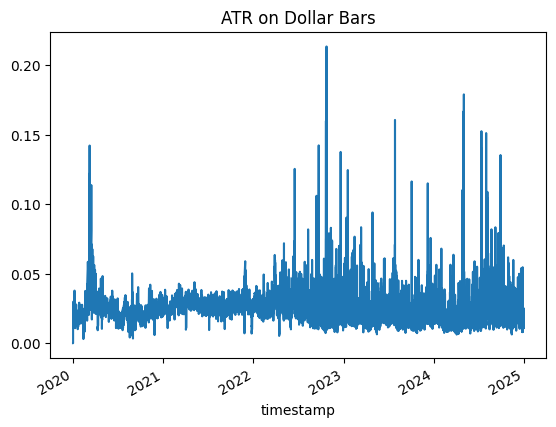

In [22]:
%%time
atr60 = get_atr(df, window=60)
atr60.describe()
atr60.plot(title='ATR on Dollar Bars')

In [23]:
trgt = atr60.reindex(t_events, method='ffill')
trgt.describe()

count    695766.000000
mean          0.027495
std           0.012719
min           0.000000
25%           0.019987
50%           0.024849
75%           0.031228
max           0.213405
Name: atr60, dtype: float64

## Apply Triple Barrier
We use daily volatility to calculate TP/SL, and we set our T1 as 1day

In [24]:
from concurrent.futures import ThreadPoolExecutor
import numpy as np
import pandas as pd

def applyPtSlOnT1(close,events,ptSl,molecule):
    # apply stop loss/profit taking, if it takes place before t1 (end of event)
    events_=events.loc[molecule]
    out=events_[['t1']].copy(deep=True)
    
    pt = ptSl[0] * events_['trgt'] if ptSl[0] > 0 else pd.Series(index=events.index)
    sl = -ptSl[1] * events_['trgt'] if ptSl[1] > 0 else pd.Series(index=events.index)

        
    for loc, t1 in events_['t1'].fillna(close.index[-1]).items():
        df0=close[loc:t1] # path prices
        df0=(df0/close[loc]-1)*events_.at[loc,'side'] # path returns
        out.loc[loc,'sl']=df0[df0<sl[loc]].index.min() # earliest stop loss
        out.loc[loc,'pt']=df0[df0>pt[loc]].index.min() # earliest profit taking
        
    return out


def parallel_apply(func, items, num_threads=4, **kwargs):
    
    def worker(molecule):
        return func(molecule=molecule, **kwargs)

    chunks = np.array_split(items, num_threads)
    
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        results = list(executor.map(worker, chunks))

    return pd.concat(results).sort_index()


def getEvents(close, tEvents, ptSl, trgt, minRet, numThreads=4, t1=False, side=None):
    # Step 1: Filter targets
    trgt = trgt.loc[tEvents]
    trgt = trgt[trgt > minRet]

    # Step 2: Set vertical barrier (t1)
    if t1 is False:
        t1 = pd.Series(pd.NaT, index=tEvents)

    # Step 3: Build events DataFrame
    if side is None:
        side_, ptSl_ = pd.Series(1., index=trgt.index), [ptSl[0], ptSl[0]]
    else:
        side_, ptSl_ = side.loc[trgt.index], ptSl[:2]

    events = pd.concat({'t1': t1, 'trgt': trgt, 'side': side_}, axis=1).dropna(subset=['trgt'])

    # Step 4: Apply barriers in parallel
    df0 = parallel_apply(
        func=applyPtSlOnT1,
        items=events.index,
        num_threads=numThreads,
        close=close,
        events=events,
        ptSl=ptSl_
    )

    # Step 5: Choose the first touched barrier
    events['t1'] = df0.dropna(how='all').min(axis=1)
    
    if side is None:
        events = events.drop('side', axis=1)
        
    return events


In [25]:
def get_vertical_barrier(t_events, close, delta=pd.Timedelta(minutes=60)):
    """
    For each event in t_events, find the timestamp in close.index 
    that is at least delta later. Returns a pd.Series of t1.
    """
    barrier_times = t_events + delta
    t1_idx = close.index.searchsorted(barrier_times)
    valid_idx = t1_idx[t1_idx < len(close)]
    t1 = pd.Series(close.index[valid_idx], index=t_events[:len(valid_idx)])
    return t1

In [26]:
t1 = get_vertical_barrier(t_events, df['close'], delta=pd.Timedelta(minutes=30))

In [27]:
t1

timestamp
2020-01-01 22:27:38.010   2020-01-01 23:02:33.329
2020-01-01 22:38:00.191   2020-01-01 23:10:39.441
2020-01-01 23:02:33.329   2020-01-01 23:36:19.371
2020-01-01 23:10:39.441   2020-01-01 23:45:21.805
2020-01-01 23:21:26.690   2020-01-01 23:56:13.494
                                    ...          
2024-12-30 23:06:27.988   2024-12-30 23:36:43.659
2024-12-30 23:08:12.101   2024-12-30 23:38:17.708
2024-12-30 23:13:31.707   2024-12-30 23:44:17.660
2024-12-30 23:17:32.270   2024-12-30 23:47:39.743
2024-12-30 23:20:43.878   2024-12-30 23:51:47.271
Name: timestamp, Length: 695760, dtype: datetime64[ns]

## Calculate minRet

In [28]:
min_ret = 0.5 * intraday_vol.median()
min_ret

np.float64(6.103421459403371e-05)

In [29]:
%%time

events = getEvents(
    df['close'],
    tEvents=t_events, 
    ptSl=[1,1], 
    trgt=vol, 
    minRet=0, 
    numThreads=16, 
    t1=t1, 
    side=None
)

CPU times: user 3min 26s, sys: 20.5 s, total: 3min 46s
Wall time: 3min 27s


In [30]:
events

,t1,trgt
timestamp,,
2020-01-01 23:21:26.690,2020-01-01 23:56:13.494,0.000286
2020-01-01 23:29:06.865,2020-01-02 00:00:28.861,0.000298
2020-01-01 23:45:21.805,2020-01-02 00:00:28.861,0.000299
2020-01-01 23:50:25.086,2020-01-02 00:32:02.876,0.000316
2020-01-02 00:17:03.844,2020-01-02 00:52:28.968,0.000178
...,...,...
2024-12-30 23:34:02.941,2024-12-30 23:40:27.389,0.000223
2024-12-30 23:38:17.708,2024-12-30 23:43:02.192,0.000192
2024-12-30 23:40:27.389,2024-12-30 23:46:24.916,0.000150


In [31]:
events

,t1,trgt
timestamp,,
2020-01-01 23:21:26.690,2020-01-01 23:56:13.494,0.000286
2020-01-01 23:29:06.865,2020-01-02 00:00:28.861,0.000298
2020-01-01 23:45:21.805,2020-01-02 00:00:28.861,0.000299
2020-01-01 23:50:25.086,2020-01-02 00:32:02.876,0.000316
2020-01-02 00:17:03.844,2020-01-02 00:52:28.968,0.000178
...,...,...
2024-12-30 23:34:02.941,2024-12-30 23:40:27.389,0.000223
2024-12-30 23:38:17.708,2024-12-30 23:43:02.192,0.000192
2024-12-30 23:40:27.389,2024-12-30 23:46:24.916,0.000150


In [32]:
events['duration'] = events['t1'] - events.index
events['duration'].describe()

count                       695761
mean     0 days 00:04:22.042234806
std      0 days 00:59:30.516567113
min         0 days 00:00:00.101000
25%         0 days 00:00:37.246000
50%         0 days 00:01:23.376000
75%         0 days 00:03:16.380000
max         3 days 00:36:23.767000
Name: duration, dtype: object

In [33]:
longest_idx = events['duration'].idxmax()
longest_event = events.loc[longest_idx]
print(f"Longest event index: {longest_idx}")
print(longest_event)

Longest event index: 2020-12-31 21:59:37.920000
t1          2021-01-03 22:36:01.687000
trgt                          0.000169
duration        3 days 00:36:23.767000
Name: 2020-12-31 21:59:37.920000, dtype: object


# Keep only intraday events

In [34]:
events = events[events.index.date==events.t1.dt.date]

## Create classification labels

In [35]:
def getBins(events, close, t1=None):
    '''
    Compute event's outcome (including side information, if provided).
    events is a DataFrame where:
    -events.index is event's starttime
    -events['t1'] is event's endtime
    -events['trgt'] is event's target
    -events['side'] (optional) implies the algo's position side
    -t1 is original vertical barrier series
    Case 1: ('side' not in events): bin in (-1,1) <-label by price action
    Case 2: ('side' in events): bin in (0,1) <-label by pnl (meta-labeling)
    '''
    # 1) prices aligned with events
    events_ = events.dropna(subset=['t1'])
    px = events_.index.union(events_['t1'].values).drop_duplicates()
    px = close.reindex(px, method='bfill')
    # 2) create out object
    out = pd.DataFrame(index=events_.index)
    out['ret'] = px.loc[events_['t1'].values].values / px.loc[
        events_.index] - 1
    if 'side' in events_: out['ret'] *= events_['side']  # meta-labeling
    out['bin'] = np.sign(out['ret'])

    if 'side' not in events_:
        # only applies when not meta-labeling.
        # to update bin to 0 when vertical barrier is touched, we need the
        # original vertical barrier series since the events['t1'] is the time
        # of first touch of any barrier and not the vertical barrier
        # specifically. The index of the intersection of the vertical barrier
        # values and the events['t1'] values indicate which bin labels needs
        # to be turned to 0.
        vtouch_first_idx = events[events['t1'].isin(t1.values)].index
        out.loc[vtouch_first_idx, 'bin'] = 0.

    if 'side' in events_: out.loc[out['ret'] <= 0, 'bin'] = 0  # meta-labeling
    return out

In [36]:
labels = getBins(events, df['close'], t1=t1)
labels["bin_class"] = labels["bin"] + 1
labels

,ret,bin,bin_class
timestamp,,,
2020-01-01 23:21:26.690,0.000235,0.0,1.0
2020-01-02 00:17:03.844,0.000189,0.0,1.0
2020-01-02 00:41:29.036,0.000267,1.0,2.0
2020-01-02 00:57:40.782,0.000299,1.0,2.0
2020-01-02 01:04:50.810,-0.000294,0.0,1.0
...,...,...,...
2024-12-30 23:32:26.048,-0.000366,-1.0,0.0
2024-12-30 23:34:02.941,0.000229,1.0,2.0
2024-12-30 23:38:17.708,0.000223,1.0,2.0


In [37]:
labels.bin.value_counts()

bin
 0.0    261594
 1.0    218609
-1.0    213666
Name: count, dtype: int64

In [38]:
labeled_events = events.join(labels, how='inner')

In [43]:
labeled_events.head()

,t1,trgt,duration,ret,bin,bin_class
timestamp,,,,,,
2020-01-01 23:21:26.690,2020-01-01 23:56:13.494,0.000286,0 days 00:34:46.804000,0.000235,0.0,1.0
2020-01-02 00:17:03.844,2020-01-02 00:52:28.968,0.000178,0 days 00:35:25.124000,0.000189,0.0,1.0
2020-01-02 00:41:29.036,2020-01-02 01:04:50.810,0.000153,0 days 00:23:21.774000,0.000267,1.0,2.0
2020-01-02 00:57:40.782,2020-01-02 01:04:50.810,0.000144,0 days 00:07:10.028000,0.000299,1.0,2.0
2020-01-02 01:04:50.810,2020-01-02 01:15:32.427,0.000167,0 days 00:10:41.617000,-0.000294,0.0,1.0


In [45]:
df.loc[labeled_events.index]

,open,high,low,close,volume,spread,log_return,log_volume
timestamp,,,,,,,,
2020-01-01 23:21:26.690,108.6435,108.6790,108.6435,108.6790,534460.000396,0.003709,0.000331,13.189014
2020-01-02 00:17:03.844,108.7110,108.7115,108.6945,108.6945,539329.998612,0.002592,-0.000166,13.198085
2020-01-02 00:41:29.036,108.6855,108.7110,108.6855,108.7025,535000.000596,0.002140,0.000175,13.190024
2020-01-02 00:57:40.782,108.7140,108.7210,108.6945,108.6990,533940.003633,0.002409,-0.000147,13.188041
2020-01-02 01:04:50.810,108.6985,108.7315,108.6985,108.7315,536660.000563,0.002551,0.000299,13.193122
...,...,...,...,...,...,...,...,...
2024-12-30 23:32:26.048,157.0300,157.0520,157.0205,157.0450,370270.000219,0.011216,0.000099,12.821990
2024-12-30 23:34:02.941,157.0455,157.0460,156.9875,156.9875,375300.000310,0.010275,-0.000366,12.835484
2024-12-30 23:38:17.708,156.9695,156.9970,156.9690,156.9965,369900.002599,0.012375,0.000182,12.820991


## Calculate Concurrency

In [39]:
def get_concurrency(events, price_index):
    """
    Calculate concurrency: number of overlapping events at each time.
    
    Args:
        events (pd.DataFrame): Must have 't1' column with index as start time.
        price_index (pd.DatetimeIndex): Full time index (e.g., from your OHLCV data).
        
    Returns:
        pd.Series: concurrency count indexed by time.
    """
    concurrency = pd.Series(0, index=price_index)

    for start, end in events['t1'].items():
        concurrency[start:end] += 1

    return concurrency


In [40]:
# Let's say your OHLCV data or close series has this index
price_index = df.index  # or df_ohlcv.index

concurrency = get_concurrency(events=labeled_events, price_index=price_index)

(array([9.76246e+05, 7.78407e+05, 5.81520e+04, 5.07000e+03, 3.28200e+03,
        1.00900e+03, 1.78000e+02, 1.11000e+02, 2.60000e+01, 6.00000e+00]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

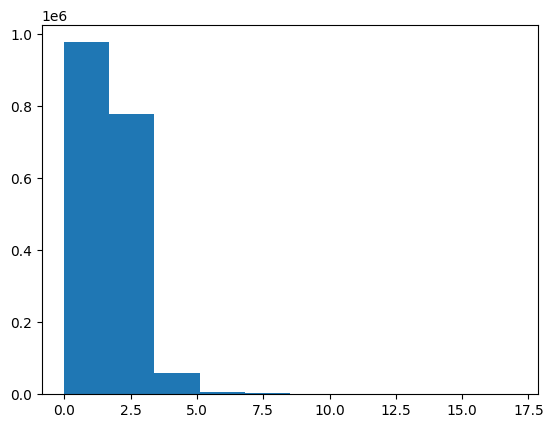

In [41]:
plt.hist(concurrency)

## Save events to disk

In [42]:
labeled_events.to_pickle(DIRECTION_LABEL_FILE_PATH)